<a href="https://colab.research.google.com/github/KalharaBatangala/Brain-tumor-detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import keras

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os


In [2]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'pituitary', 'notumor']

for i in labels:
  folderPath = os.path.join('./drive/MyDrive/DatasetMRI/Training/', i)    #dataset in the google drive
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath, j))
    img = cv2.resize(img, (image_size, image_size))
    X_train.append(img)
    Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
print('Completed successfully')

Completed successfully


In [3]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape[0]

5702

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

**Train Test Split**

In [5]:
y_train_new = []

for i in y_train:
  y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []

for i in y_test:
  y_test_new.append(labels.index(i))
y_test = y_test_new

y_test = tf.keras.utils.to_categorical(y_test)



**Creating the CNN model**

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 48s 176ms/step - accuracy: 0.3125 - loss: 3.4119 - val_accuracy: 0.4027 - val_loss: 1.2631
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.6061 - loss: 0.9375 - val_accuracy: 0.5642 - val_loss: 1.0076
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.7110 - loss: 0.6759 - val_accuracy: 0.5603 - val_loss: 1.0262
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7773 - loss: 0.5243 - val_accuracy: 0.7004 - val_loss: 0.6861
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.8067 - loss: 0.4650 - val_accuracy: 0.7082 - val_loss: 0.7575
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.8299 - loss: 0.4317 - val_accuracy: 0.7354 - val_loss: 0.7233
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.8567 - loss: 0.3593 - val_accuracy: 0.7704 - val_loss: 0.6146
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8714 - loss: 0.3324 -

In [11]:
model.save('braintumor_model1.h5')
model.save('braintumor_model1_keras.keras')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

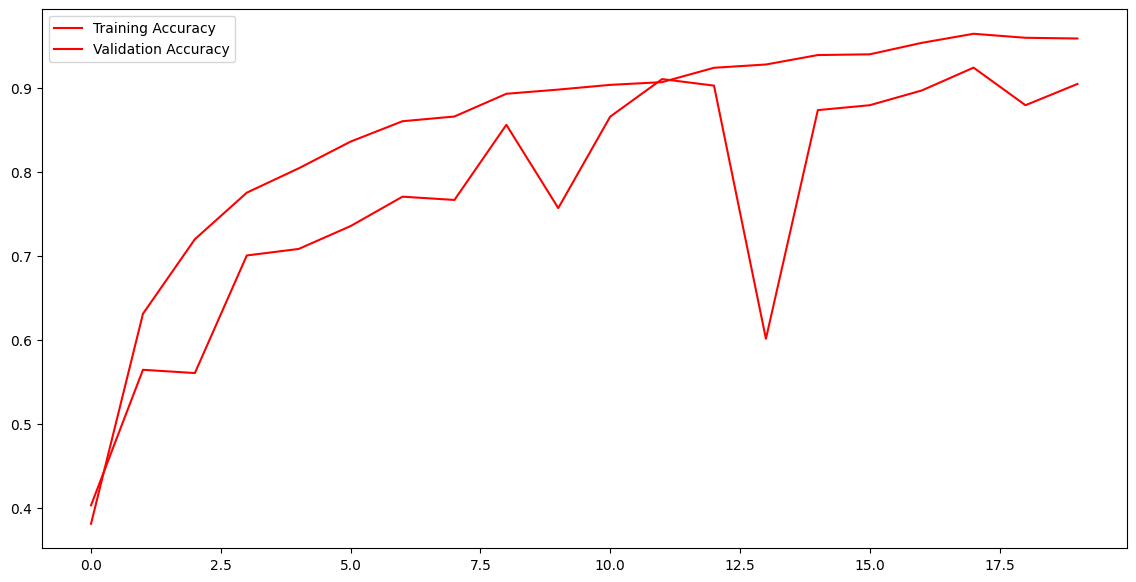

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc,'r',label="Training Accuracy")
plt.plot(epochs, val_acc,'r',label="Validation Accuracy")

plt.legend(loc='upper left')
plt.show()